In [12]:
import array_to_latex
from helper import *
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import numpy as np
import pandas as pd
import pickle

%matplotlib inline

In [13]:
pamine_df = pd.read_csv('../../files/pamine_df.csv')
pAA_df = pd.read_csv('../../files/pAA_df.csv')
cooh_df = pd.read_csv('../../files/cooh_df.csv')

umap_coordinates = pd.read_csv('../../files/truncates_UMAP.csv')

In [14]:
pamine_umap = pamine_df.merge(umap_coordinates, on='truncate_SMILES')
pAA_umap = pAA_df.merge(umap_coordinates, on='truncate_SMILES')
cooh_umap = cooh_df.merge(umap_coordinates, on='truncate_SMILES')

In [15]:
pamine_umap['mol'] = pamine_umap['BB_SMILES'].apply(Chem.MolFromSmiles)
cooh_umap['mol'] = cooh_umap['BB_SMILES'].apply(Chem.MolFromSmiles)

pamine_umap['MW'] = pamine_umap['mol'].apply(Descriptors.MolWt)
cooh_umap['MW'] = cooh_umap['mol'].apply(Descriptors.MolWt)

pamine_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in pamine_umap['mol']]
cooh_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in cooh_umap['mol']]

pamine_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in pamine_umap['mol']]
cooh_umap['fp'] = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in cooh_umap['mol']]

### Figure 2: Comparison of $1^{o}$ amino and $1^{o}$ amine building blocks

In [16]:
z_pamine = kde_(pamine_umap)
z_pAA = kde_(pAA_umap)
z_cooh = kde_(cooh_umap)

In [17]:
xlim = [-5.5, 20.5]
ylim = [-8, 11]

In [18]:
### Convert densities to the same range

t_min = np.min([np.min(z_pamine), np.min(z_pAA), np.min(z_cooh)])
t_max = np.max([np.max(z_pamine), np.max(z_pAA), np.max(z_cooh)])

### Figure 3: Building block cost filtering 

In [19]:
pamine_100 = pamine_umap.loc[pamine_umap['Price_250mg'] <= 100].drop_duplicates(subset='truncate_SMILES')
pamine_250 = pamine_umap.loc[pamine_umap['Price_250mg'] <= 250].drop_duplicates(subset='truncate_SMILES')
pamine_500 = pamine_umap.loc[pamine_umap['Price_250mg'] <= 500].drop_duplicates(subset='truncate_SMILES')

pAA_100 = pAA_umap.loc[pAA_umap['Price_250mg'] <= 100].drop_duplicates(subset='truncate_SMILES')
pAA_250 = pAA_umap.loc[pAA_umap['Price_250mg'] <= 250].drop_duplicates(subset='truncate_SMILES')
pAA_500 = pAA_umap.loc[pAA_umap['Price_250mg'] <= 500].drop_duplicates(subset='truncate_SMILES')

cooh_100 = cooh_umap.loc[cooh_umap['Price_250mg'] <= 100].drop_duplicates(subset='truncate_SMILES')
cooh_250 = cooh_umap.loc[cooh_umap['Price_250mg'] <= 250].drop_duplicates(subset='truncate_SMILES')
cooh_500 = cooh_umap.loc[cooh_umap['Price_250mg'] <= 500].drop_duplicates(subset='truncate_SMILES')

In [20]:
z_pamine_100 = kde_(pamine_100)
z_pamine_250 = kde_(pamine_250)
z_pamine_500 = kde_(pamine_500)

z_pAA_100 = kde_(pAA_100)
z_pAA_250 = kde_(pAA_250)
z_pAA_500 = kde_(pAA_500)

z_cooh_100 = kde_(cooh_100)
z_cooh_250 = kde_(cooh_250)
z_cooh_500 = kde_(cooh_500)

In [21]:
cost_z_min = np.min([np.min(z_cooh_100), np.min(z_pAA_100), np.min(z_pamine_100),
          np.min(z_cooh_250), np.min(z_pAA_250), np.min(z_pamine_250),
          np.min(z_cooh_500), np.min(z_pAA_500), np.min(z_pamine_500)])

cost_z_max = np.max([np.max(z_cooh_100), np.max(z_pAA_100), np.max(z_pamine_100),
           np.max(z_cooh_250), np.max(z_pAA_250), np.max(z_pamine_250),
           np.max(z_cooh_500), np.max(z_pAA_500), np.max(z_pamine_500)])

### Number of shared truncates based on applied filter

#### Cost  $\leq$ \$100

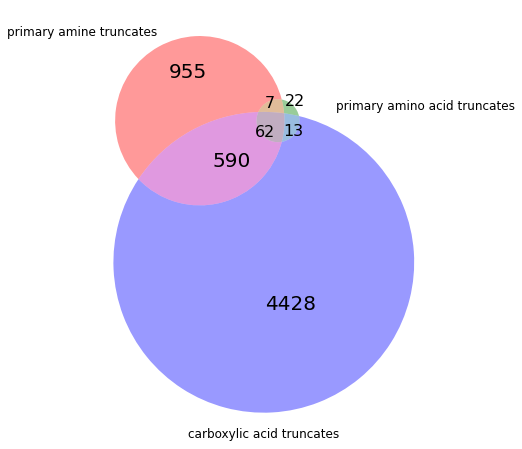

In [22]:
pAA_truncates = set(pAA_100['truncate_SMILES'])
pamine_truncates = set(pamine_100['truncate_SMILES'])
cooh_truncates = set(cooh_100['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.16, 0.43))
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[6].set_fontsize(16)

#fig.savefig('../../figures/SI/cost_100_venn.png')
#fig.savefig('../../figures/SI/cost_100_venn.svg')

#### Cost $\leq$ \$250

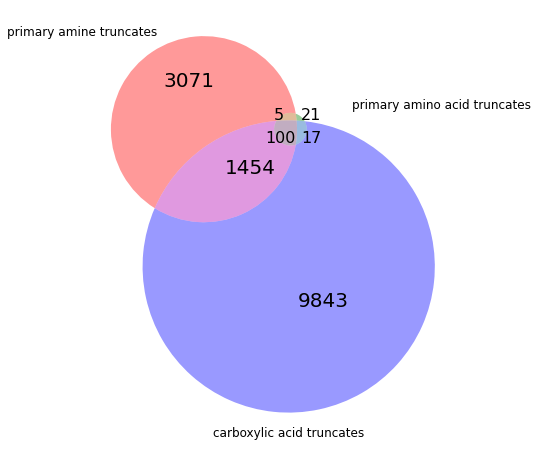

In [23]:
pAA_truncates = set(pAA_250['truncate_SMILES'])
pamine_truncates = set(pamine_250['truncate_SMILES'])
cooh_truncates = set(cooh_250['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.16, 0.38)) # green
v3_s.subset_labels[2].set_position((0.05, 0.38)) # yellow
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[5].set_position((0.16, 0.30)) # turquoise
v3_s.subset_labels[6].set_fontsize(16)

#fig.savefig('../../figures/SI/cost_250_venn.png')
#fig.savefig('../../figures/SI/cost_250_venn.svg')

#### Cost $\leq$ \$500

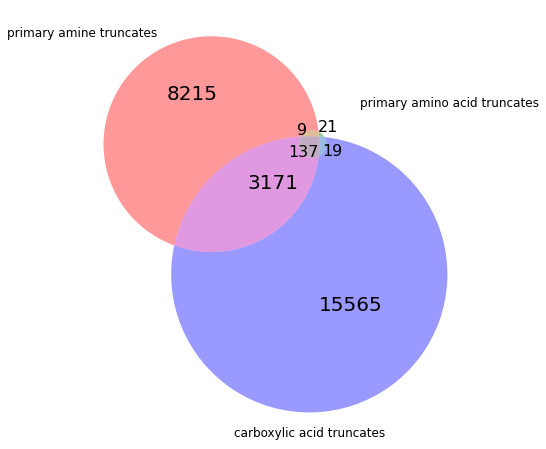

In [24]:
pAA_truncates = set(pAA_500['truncate_SMILES'])
pamine_truncates = set(pamine_500['truncate_SMILES'])
cooh_truncates = set(cooh_500['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.19, 0.33)) # green
v3_s.subset_labels[2].set_position((0.1, 0.32)) # yellow
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[5].set_position((0.205, 0.25)) # turquoise
v3_s.subset_labels[6].set_fontsize(16)

#fig.savefig('../../figures/SI/cost_500_venn.png')
#fig.savefig('../../figures/SI/cost_500_venn.svg')

#### No cost filter

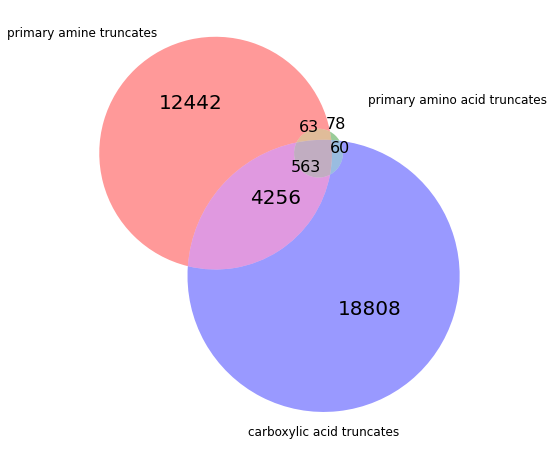

In [25]:
pAA_truncates = set(pAA_umap['truncate_SMILES'])
pamine_truncates = set(pamine_umap['truncate_SMILES'])
cooh_truncates = set(cooh_umap['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.19, 0.33)) # green
v3_s.subset_labels[2].set_position((0.1, 0.32)) # yellow
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[5].set_position((0.205, 0.25)) # turquoise
v3_s.subset_labels[6].set_fontsize(16)

#fig.savefig('../../figures/SI/no_cost_venn.png')
fig.savefig('../../figures/SI/no_cost_venn.svg')

In [26]:
cost_val = np.zeros((4,3))
cost_val[0][0] = len(set(pAA_100['truncate_SMILES']))
cost_val[0][1] = len(set(pamine_100['truncate_SMILES']))
cost_val[0][2] = len(set(cooh_100['truncate_SMILES']))

cost_val[1][0] = len(set(pAA_250['truncate_SMILES']))
cost_val[1][1] = len(set(pamine_250['truncate_SMILES']))
cost_val[1][2] = len(set(cooh_250['truncate_SMILES']))

cost_val[2][0] = len(set(pAA_500['truncate_SMILES']))
cost_val[2][1] = len(set(pamine_500['truncate_SMILES']))
cost_val[2][2] = len(set(cooh_500['truncate_SMILES']))

cost_val[3][0] = len(set(pAA_umap['truncate_SMILES']))
cost_val[3][1] = len(set(pamine_umap['truncate_SMILES']))
cost_val[3][2] = len(set(cooh_umap['truncate_SMILES']))

array_to_latex.to_ltx(cost_val, frmt='{:n}', arraytype='tabular')

\begin{tabular}
  104  &  1614  &  5093 \\
  143  &  4630  &  11414 \\
  186  &  11532  &  18892 \\
  764  &  17324  &  23687 
\end{tabular}


### Figure 4: PCP filtering for building blocks (not the truncates)

In [27]:
pg_dict = pickle.load(open('../data_prep/PG_SMILES.pkl', 'rb'))
pg_smirks = pickle.load(open('../data_prep/deprot_SMIRKS.pkl', 'rb'))

#### Primary amines

In [28]:
## Need to adjust MW calcs for BBs containing protecting groups
pamine_umap['fmoc'] = pamine_umap['BB_SMILES'].apply(lambda smi: has_pg(smi, pg_dict['fmoc']))
pamine_umap['nboc'] = pamine_umap['BB_SMILES'].apply(lambda smi: has_pg(smi, pg_dict['nboc']))

In [29]:
pamine_mols = make_molecules(pamine_umap['BB_SMILES'])
pamine_umap['molecules'] = pamine_mols
pamine_umap['mw'] = pamine_umap['molecules'].apply(oechem.OECalculateMolecularWeight)
pamine_umap['tpsa'] = pamine_umap['molecules'].apply(oemolprop.OEGet2dPSA)
pamine_umap['hbd'] = pamine_umap['molecules'].apply(oemolprop.OEGetHBondDonorCount)
pamine_umap['hba'] = pamine_umap['molecules'].apply(oemolprop.OEGetHBondAcceptorCount)

pamine_xlogp = np.ones(len(pamine_umap)) * 100
for i in range(len(pamine_umap)):
    mol = pamine_umap['molecules'].iloc[i]
    try:
        pamine_xlogp[i] = oemolprop.OEGetXLogP(mol)
    except:
        pass
pamine_umap['xlogp'] = pamine_xlogp

#### Primary amino acids

In [30]:
## Need to adjust MW calcs for BBs containing protecting groups
pAA_umap['fmoc'] = pAA_umap['BB_SMILES'].apply(lambda smi: has_pg(smi, pg_dict['fmoc']))
pAA_umap['nboc'] = pAA_umap['BB_SMILES'].apply(lambda smi: has_pg(smi, pg_dict['nboc']))

In [31]:
pAA_umap['deprot_smi'] = pAA_umap['BB_SMILES'].apply(lambda smi: deprotectGroup(smi, pg_smirks['fmoc']))

In [32]:
pAA_mols = make_molecules(pAA_umap['deprot_smi'])
pAA_umap['molecules'] = pAA_mols
pAA_umap['mw'] = pAA_umap['molecules'].apply(oechem.OECalculateMolecularWeight)
pAA_umap['tpsa'] = pAA_umap['molecules'].apply(oemolprop.OEGet2dPSA)
pAA_umap['hbd'] = pAA_umap['molecules'].apply(oemolprop.OEGetHBondDonorCount)
pAA_umap['hba'] = pAA_umap['molecules'].apply(oemolprop.OEGetHBondAcceptorCount)

pAA_xlogp = np.ones(len(pAA_umap)) * 100
for i in range(len(pAA_umap)):
    mol = pAA_umap['molecules'].iloc[i]
    try:
        pAA_xlogp[i] = oemolprop.OEGetXLogP(mol)
    except:
        pass
pAA_umap['xlogp'] = pAA_xlogp

#### Carboxylic acids

In [33]:
## Need to adjust MW calcs for BBs containing protecting groups
cooh_umap['fmoc'] = cooh_umap['BB_SMILES'].apply(lambda smi: has_pg(smi, pg_dict['fmoc']))
cooh_umap['nboc'] = cooh_umap['BB_SMILES'].apply(lambda smi: has_pg(smi, pg_dict['nboc']))

In [34]:
cooh_mols = make_molecules(cooh_umap['BB_SMILES'])
cooh_umap['molecules'] = cooh_mols
cooh_umap['mw'] = cooh_umap['molecules'].apply(oechem.OECalculateMolecularWeight)
cooh_umap['tpsa'] = cooh_umap['molecules'].apply(oemolprop.OEGet2dPSA)
cooh_umap['hbd'] = cooh_umap['molecules'].apply(oemolprop.OEGetHBondDonorCount)
cooh_umap['hba'] = cooh_umap['molecules'].apply(oemolprop.OEGetHBondAcceptorCount)

cooh_xlogp = np.ones(len(cooh_umap)) * 100
for i in range(len(cooh_umap)):
    mol = cooh_umap['molecules'].iloc[i]
    try:
        cooh_xlogp[i] = oemolprop.OEGetXLogP(mol)
    except:
        pass
cooh_umap['xlogp'] = cooh_xlogp

In [35]:
## Implement MW filters (MW: <=200, <=250, <=300)

pamine_mw200 = pamine_umap.loc[pamine_umap['mw'] <= 200].drop_duplicates(subset='truncate_SMILES')
pamine_mw250 = pamine_umap.loc[pamine_umap['mw'] <= 250].drop_duplicates(subset='truncate_SMILES')
pamine_mw300 = pamine_umap.loc[pamine_umap['mw'] <= 300].drop_duplicates(subset='truncate_SMILES')

pAA_mw200 = pAA_umap.loc[pAA_umap['mw'] <= 200].drop_duplicates(subset='truncate_SMILES')
pAA_mw250 = pAA_umap.loc[pAA_umap['mw'] <= 250].drop_duplicates(subset='truncate_SMILES')
pAA_mw300 = pAA_umap.loc[pAA_umap['mw'] <= 300].drop_duplicates(subset='truncate_SMILES')

cooh_mw200 = cooh_umap.loc[cooh_umap['mw'] <= 200].drop_duplicates(subset='truncate_SMILES')
cooh_mw250 = cooh_umap.loc[cooh_umap['mw'] <= 250].drop_duplicates(subset='truncate_SMILES')
cooh_mw300 = cooh_umap.loc[cooh_umap['mw'] <= 300].drop_duplicates(subset='truncate_SMILES')

In [36]:
z_pamine_mw200 = kde_(pamine_mw200)
z_pamine_mw250 = kde_(pamine_mw250)
z_pamine_mw300 = kde_(pamine_mw300)

z_pAA_mw200 = kde_(pAA_mw200)
z_pAA_mw250 = kde_(pAA_mw250)
z_pAA_mw300 = kde_(pAA_mw300)

z_cooh_mw200 = kde_(cooh_mw200)
z_cooh_mw250 = kde_(cooh_mw250)
z_cooh_mw300 = kde_(cooh_mw300)

In [37]:
z_mw_min = np.min([np.min(z_cooh_mw200), np.min(z_pAA_mw200), np.min(z_pamine_mw200),
          np.min(z_cooh_mw250), np.min(z_pAA_mw250), np.min(z_pamine_mw250),
          np.min(z_cooh_mw300), np.min(z_pAA_mw300), np.min(z_pamine_mw300)])

z_mw_max = np.max([np.max(z_cooh_mw200), np.max(z_pAA_mw200), np.max(z_pamine_mw200),
           np.max(z_cooh_mw250), np.max(z_pAA_mw250), np.max(z_pamine_mw250),
           np.max(z_cooh_mw300), np.max(z_pAA_mw300), np.max(z_pamine_mw300)])

### Number of shared truncates based on applied filter

#### MW $\leq$ 200

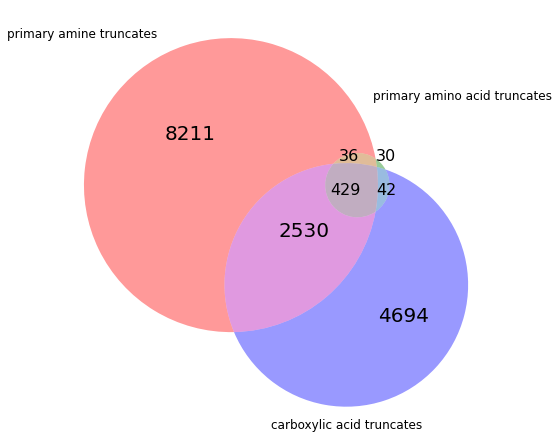

In [38]:
pAA_truncates = set(pAA_mw200['truncate_SMILES'])
pamine_truncates = set(pamine_mw200['truncate_SMILES'])
cooh_truncates = set(cooh_mw200['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.34, 0.22)) # green
v3_s.subset_labels[2].set_position((0.22, 0.22)) # yellow
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[5].set_position((0.34, 0.11)) # turquoise
v3_s.subset_labels[6].set_fontsize(16)
v3_s.subset_labels[6].set_position((0.21, 0.11)) # purple

#fig.savefig('../../figures/SI/mw_200_venn.png')
fig.savefig('../../figures/SI/mw_200_venn.svg')

#### MW $\leq$ 250

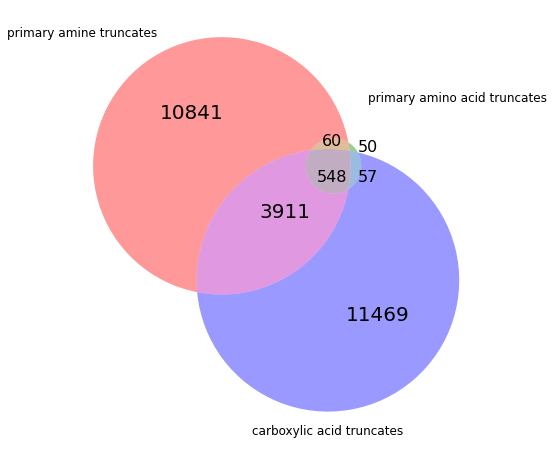

In [39]:
pAA_truncates = set(pAA_mw250['truncate_SMILES'])
pamine_truncates = set(pamine_mw250['truncate_SMILES'])
cooh_truncates = set(cooh_mw250['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.30, 0.25)) # green
v3_s.subset_labels[2].set_position((0.18, 0.27)) # yellow
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[5].set_position((0.30, 0.15)) # turquoise
v3_s.subset_labels[6].set_fontsize(16)
v3_s.subset_labels[6].set_position((0.18, 0.15)) # purple

#fig.savefig('../../figures/SI/mw_250_venn.png')
fig.savefig('../../figures/SI/mw_250_venn.svg')

#### MW $\leq$ 300

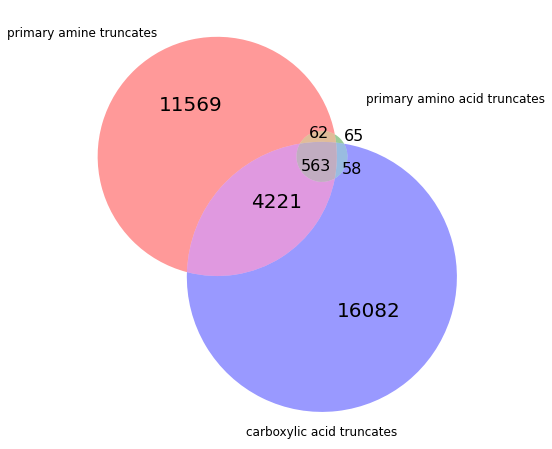

In [40]:
pAA_truncates = set(pAA_mw300['truncate_SMILES'])
pamine_truncates = set(pamine_mw300['truncate_SMILES'])
cooh_truncates = set(cooh_mw300['truncate_SMILES'])

fig, axs = plt.subplots(figsize=(8,8))
A_3 = pamine_truncates - (pAA_truncates | cooh_truncates)
B_3 = pAA_truncates - (pamine_truncates | cooh_truncates)
C_3 = (pamine_truncates & pAA_truncates) - cooh_truncates
D_3 = cooh_truncates - (pamine_truncates | pAA_truncates)
E_3 = (pamine_truncates & cooh_truncates) - pAA_truncates
F_3 = (pAA_truncates & cooh_truncates) - pamine_truncates
G_3 = pamine_truncates & pAA_truncates & cooh_truncates

v3_s = venn3(subsets=(len(A_3),len(B_3),len(C_3),len(D_3),len(E_3),len(F_3),len(G_3)), ax=axs)
v3_s.get_label_by_id('A').set_text('primary amine truncates')
v3_s.get_label_by_id('B').set_text('primary amino acid truncates')
v3_s.get_label_by_id('C').set_text('carboxylic acid truncates')
v3_s.get_label_by_id('B').set_position((0.3, 0.4))
v3_s.subset_labels[0].set_fontsize(20)
v3_s.subset_labels[1].set_fontsize(16)
v3_s.subset_labels[1].set_position((0.26, 0.29)) # green
v3_s.subset_labels[2].set_position((0.14, 0.30)) # yellow
v3_s.subset_labels[2].set_fontsize(16)
v3_s.subset_labels[3].set_fontsize(20)
v3_s.subset_labels[4].set_fontsize(20)
v3_s.subset_labels[5].set_fontsize(16)
v3_s.subset_labels[5].set_position((0.25, 0.18)) # turquoise
v3_s.subset_labels[6].set_fontsize(16)
v3_s.subset_labels[6].set_position((0.13, 0.19)) # purple

#fig.savefig('../../figures/SI/mw_300_venn.png')
fig.savefig('../../figures/SI/mw_300_venn.svg')

In [41]:
pcp_val = np.zeros((4,3))
pcp_val[0][0] = len(set(pAA_mw200['truncate_SMILES']))
pcp_val[0][1] = len(set(pamine_mw200['truncate_SMILES']))
pcp_val[0][2] = len(set(cooh_mw200['truncate_SMILES']))

pcp_val[1][0] = len(set(pAA_mw250['truncate_SMILES']))
pcp_val[1][1] = len(set(pamine_mw250['truncate_SMILES']))
pcp_val[1][2] = len(set(cooh_mw250['truncate_SMILES']))

pcp_val[2][0] = len(set(pAA_mw300['truncate_SMILES']))
pcp_val[2][1] = len(set(pamine_mw300['truncate_SMILES']))
pcp_val[2][2] = len(set(cooh_mw300['truncate_SMILES']))

pcp_val[3][0] = len(set(pAA_umap['truncate_SMILES']))
pcp_val[3][1] = len(set(pamine_umap['truncate_SMILES']))
pcp_val[3][2] = len(set(cooh_umap['truncate_SMILES']))

array_to_latex.to_ltx(pcp_val, frmt='{:n}', arraytype='tabular')

\begin{tabular}
  537  &  11206  &  7695 \\
  715  &  15360  &  15985 \\
  748  &  16415  &  20924 \\
  764  &  17324  &  23687 
\end{tabular}


### Figure 5: Selection strategies

In [42]:
pamine_rand = random_selection(pamine_umap, N=192, seed=0)
cooh_rand = random_selection(cooh_umap, N=192, seed=0)

In [43]:
pamine_unif = uniform_selection(pamine_umap, N=192, seed=1)
cooh_unif = uniform_selection(cooh_umap, N=192, seed=1)

In [44]:
pamine_div = diversity_selection(pamine_umap, N=192, seed=2)
cooh_div = diversity_selection(cooh_umap, N=192, seed=2)

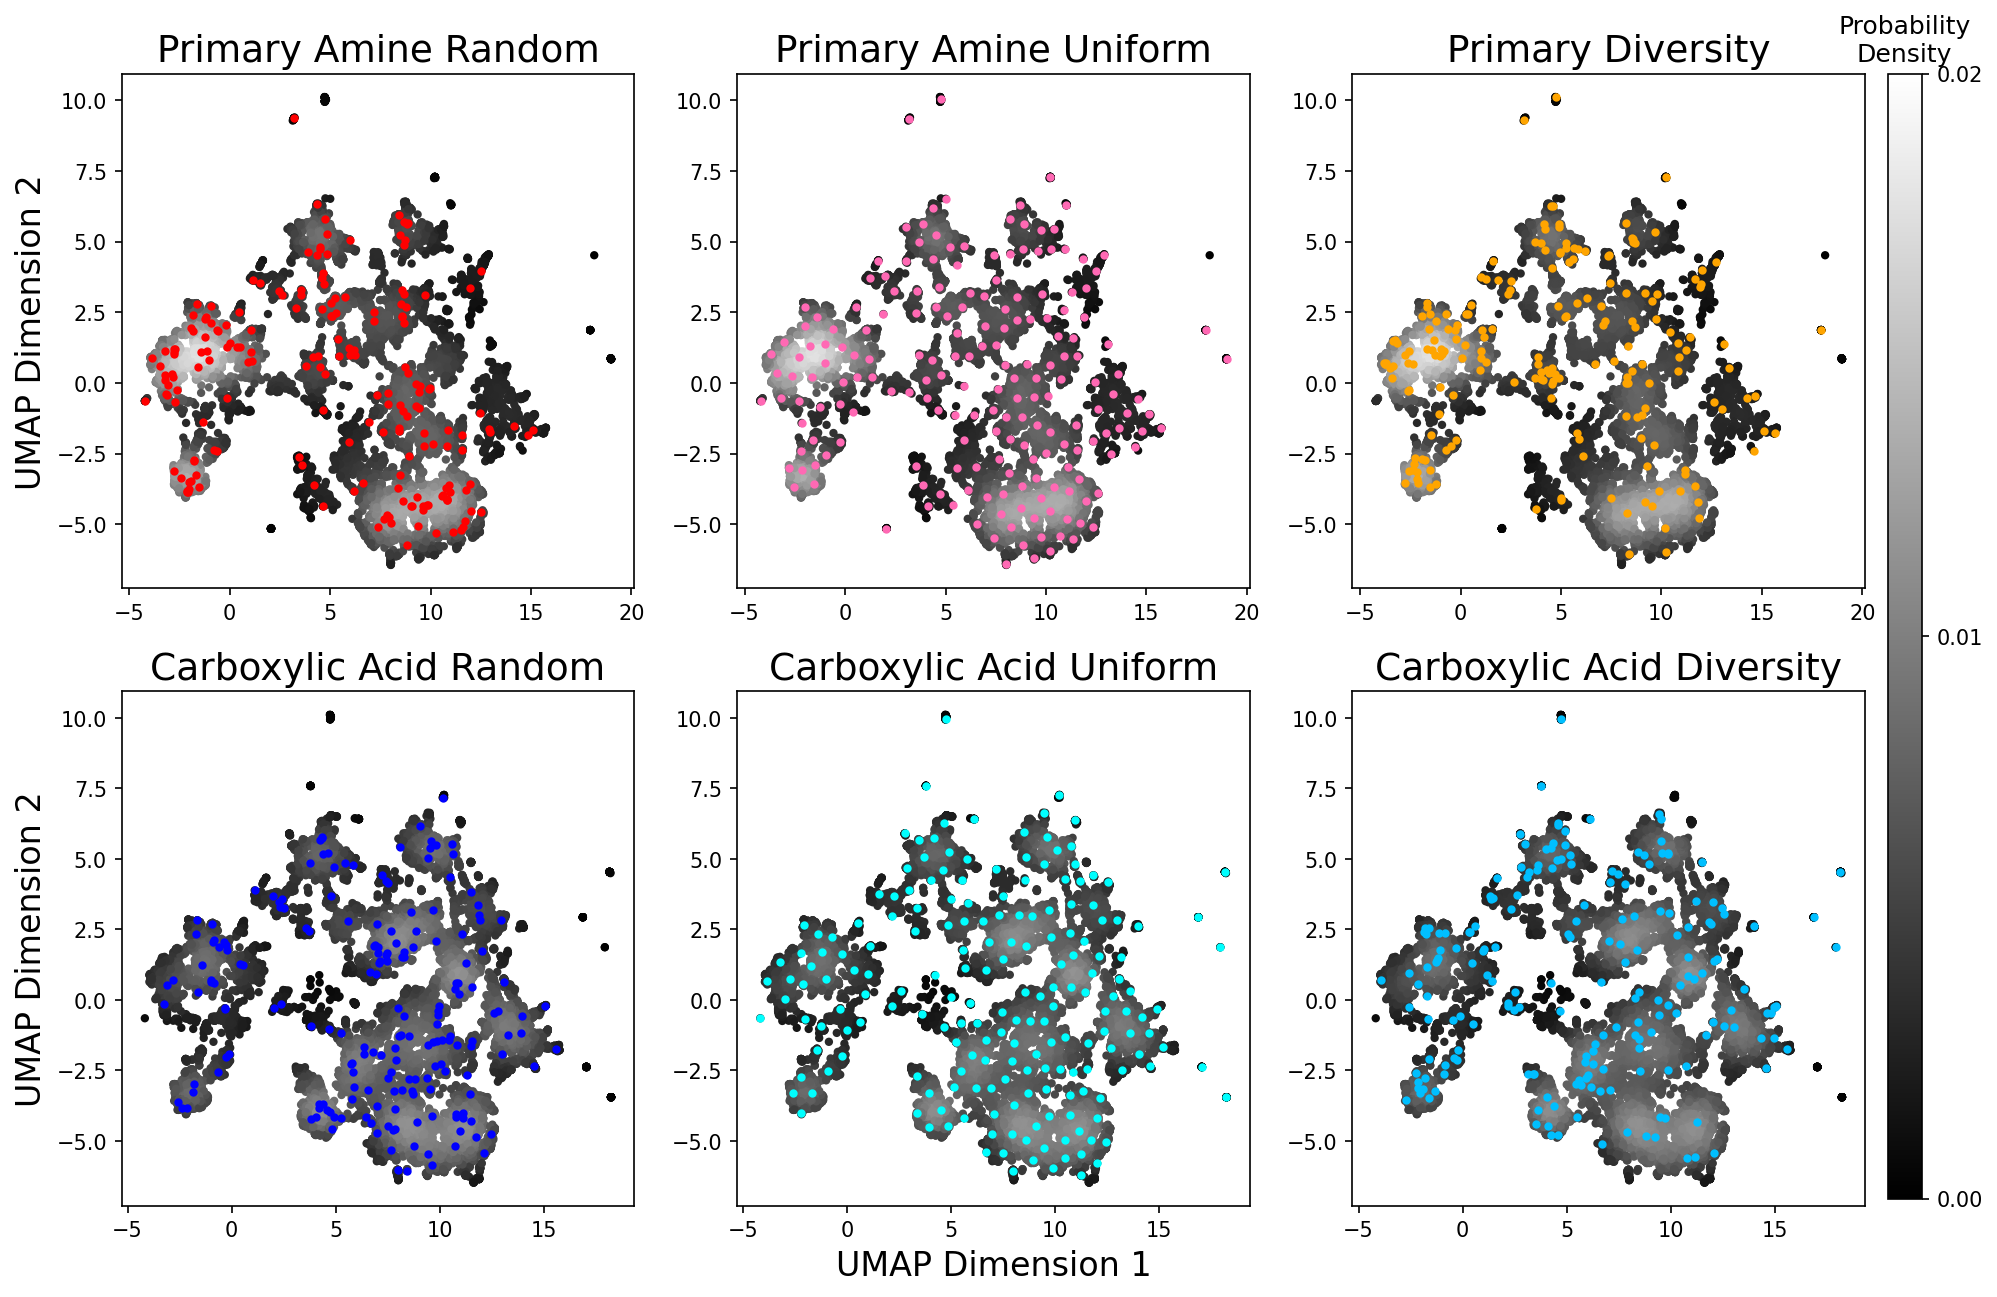

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(15,10), dpi=150)
sc = axs[0][0].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray',
              vmin=t_min, vmax=t_max)
axs[0][0].scatter(pamine_rand['X'], pamine_rand['Y'], marker='.', color='red', alpha=1)
axs[0][0].set_title('Primary Amine Random', fontsize=18)

axs[0][1].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray',
              vmin=t_min, vmax=t_max)
axs[0][1].scatter(pamine_unif['X'], pamine_unif['Y'], marker='.', color='hotpink')
axs[0][1].set_title('Primary Amine Uniform', fontsize=18)

axs[0][2].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray',
              vmin=t_min, vmax=t_max)
axs[0][2].scatter(pamine_div['X'], pamine_div['Y'], marker='.', color='orange')
axs[0][2].set_title('Primary Diversity', fontsize=18)

cbar_ax = fig.add_axes([0.91, 0.13, 0.015, 0.75])
cbar_ax.set_title("Probability\nDensity")

n_ticks = 3
cbar = plt.colorbar(sc, cbar_ax)
cbar.set_ticks(np.linspace(t_min, t_max, n_ticks))
cbar.set_ticklabels([f"{x:.2f}" for x in np.linspace(t_min, t_max, n_ticks)])

axs[1][0].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray',
                 vmin=t_min, vmax=t_max)
axs[1][0].scatter(cooh_rand['X'], cooh_rand['Y'], marker='.', color='blue', alpha=1)
axs[1][0].set_title('Carboxylic Acid Random', fontsize=18)

axs[1][1].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray',
                 vmin=t_min, vmax=t_max)
axs[1][1].scatter(cooh_unif['X'], cooh_unif['Y'], marker='.', color='aqua')
axs[1][1].set_title('Carboxylic Acid Uniform', fontsize=18)

axs[1][2].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray',
                 vmin=t_min, vmax=t_max)
axs[1][2].scatter(cooh_div['X'], cooh_div['Y'], marker='.', color='deepskyblue')
axs[1][2].set_title('Carboxylic Acid Diversity', fontsize=18)

axs[0][0].set_ylabel('UMAP Dimension 2', fontsize=16)
axs[1][0].set_ylabel('UMAP Dimension 2', fontsize=16)

axs[1][1].set_xlabel('UMAP Dimension 1', fontsize=16)

fig.savefig('../../figures/SI/BB_selection.png')

plt.show()

### Visualize example BBs from each selection strategy

In [64]:
def show_sample(BB_df):
    mols = [Chem.MolFromSmiles(smi) for smi in BB_df['truncate_SMILES']]
    display(Chem.Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200)))

In [66]:
prand = pamine_rand.iloc[:5]
punif = pamine_unif.iloc[:5]
pdiv = pamine_div.iloc[:5]

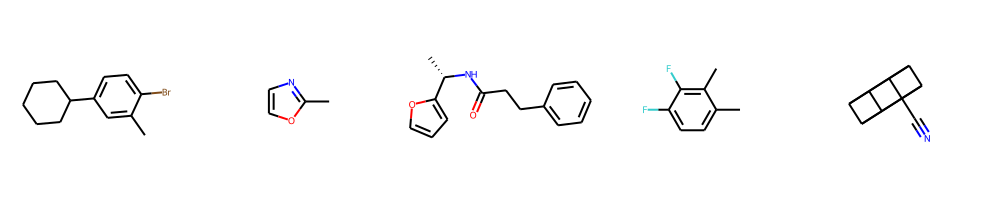

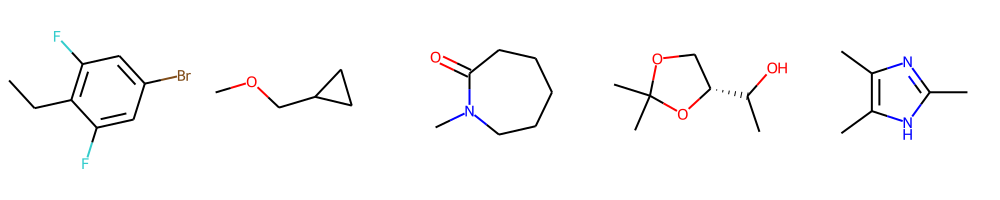

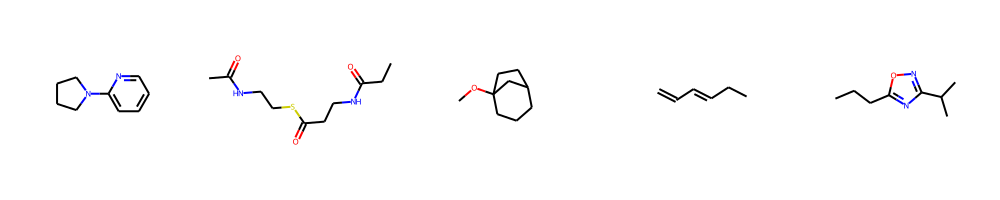

In [67]:
show_sample(prand)
show_sample(punif)
show_sample(pdiv)

In [68]:
crand = cooh_rand.iloc[:5]
cunif = cooh_unif.iloc[:5]
cdiv = cooh_div.iloc[:5]

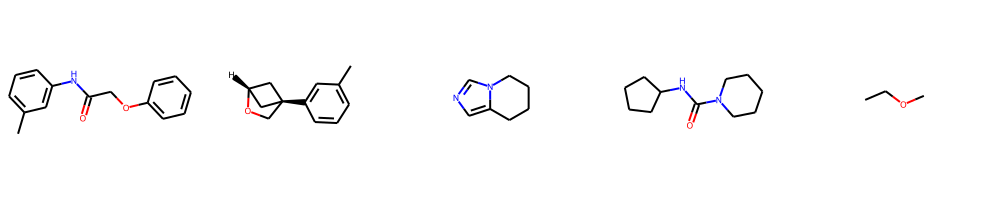

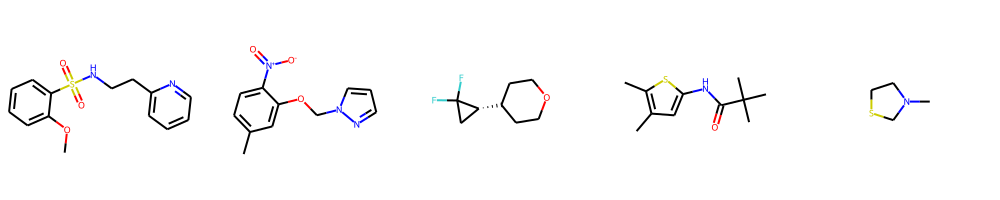

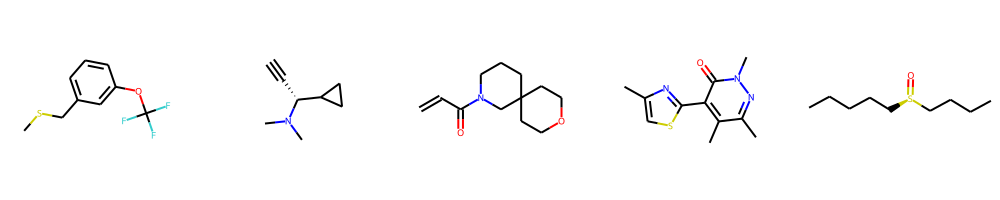

In [69]:
show_sample(crand)
show_sample(cunif)
show_sample(cdiv)

### Generate building block lists

As a starting point for research groups, we provide sample building block lists based on our BB selection methods.

All lists are generated using defaults of: MW $\leq$ 250 and cost $\leq$ \$250 filters. We vary the selection strategy and number of building blocks per cycle.

In [ ]:
pamine_pool = pamine_umap.loc[(pamine_umap['Price_250mg'] <= 250) & (pamine_umap['MW'] <= 250)]
cooh_pool = cooh_umap.loc[(cooh_umap['Price_250mg'] <= 250) & (cooh_umap['MW'] <= 250)]

In [ ]:
strats = ['rand', 'unif', 'div']
pool_size = [96, 192, 288]

for strat in strats:
    for n in pool_size:
        if strat == 'rand':
            selection = random_selection(pamine_pool, N=n, seed=0)
        elif strat == 'unif':
            selection = uniform_selection(pamine_pool, N=n, seed=1)
        elif strat == 'div':
            selection = diversity_selection(pamine_pool, N=n, seed=2)
        
        columns = ['ID', 'Price_250mg', 'BB_SMILES', 'truncate_SMILES', 'X', 'Y', 'MW']
        selection[columns].to_csv(f'../../files/library_enum_lists/pamine_{strat}_{n}.csv', index=False)

In [ ]:
strats = ['rand', 'unif', 'div']
pool_size = [96, 192, 288]

for strat in strats:
    for n in pool_size:
        if strat == 'rand':
            selection = random_selection(cooh_pool, N=n, seed=0)
        elif strat == 'unif':
            selection = uniform_selection(cooh_pool, N=n, seed=1)
        elif strat == 'div':
            selection = diversity_selection(cooh_pool, N=n, seed=2)
        
        columns = ['ID', 'Price_250mg', 'BB_SMILES', 'truncate_SMILES', 'X', 'Y', 'MW']
        selection[columns].to_csv(f'../../files/library_enum_lists/cooh_{strat}_{n}.csv', index=False)

In [ ]:
path = '../../files/library_enum_lists/'
p_r_96 = pd.read_csv(path + 'pamine_rand_96.csv')
p_r_192 = pd.read_csv(path + 'pamine_rand_192.csv')
p_r_288 = pd.read_csv(path + 'pamine_rand_288.csv')

p_u_96 = pd.read_csv(path + 'pamine_unif_96.csv')
p_u_192 = pd.read_csv(path + 'pamine_unif_192.csv')
p_u_288 = pd.read_csv(path + 'pamine_unif_288.csv')

p_d_96 = pd.read_csv(path + 'pamine_div_96.csv')
p_d_192 = pd.read_csv(path + 'pamine_div_192.csv')
p_d_288 = pd.read_csv(path + 'pamine_div_288.csv')

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15,15), dpi=150)
sc = axs[0][0].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[0][0].scatter(p_r_96['X'], p_r_96['Y'], marker='.', color='red')
axs[0][0].set_title('random, n=96', fontsize=18)

axs[0][1].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[0][1].scatter(p_r_192['X'], p_r_192['Y'], marker='.', color='red')
axs[0][1].set_title('random, n=192', fontsize=18)

axs[0][2].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[0][2].scatter(p_r_288['X'], p_r_288['Y'], marker='.', color='red')
axs[0][2].set_title('random, n=288', fontsize=18)


axs[1][0].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[1][0].scatter(p_u_96['X'], p_u_96['Y'], marker='.', color='pink')
axs[1][0].set_title('uniform, n=96', fontsize=18)

axs[1][1].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[1][1].scatter(p_u_192['X'], p_u_192['Y'], marker='.', color='pink')
axs[1][1].set_title('uniform, n=192', fontsize=18)

axs[1][2].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[1][2].scatter(p_u_288['X'], p_u_288['Y'], marker='.', color='pink')
axs[1][2].set_title('uniform, n=288', fontsize=18)


axs[2][0].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[2][0].scatter(p_d_96['X'], p_d_96['Y'], marker='.', color='orange')
axs[2][0].set_title('diversity, n=96', fontsize=18)

axs[2][1].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[2][1].scatter(p_d_192['X'], p_d_192['Y'], marker='.', color='orange')
axs[2][1].set_title('diversity, n=192', fontsize=18)

axs[2][2].scatter(pamine_umap['X'], pamine_umap['Y'], marker='.', c=z_pamine, cmap='gray', vmin=t_min, vmax=t_max)
axs[2][2].scatter(p_d_288['X'], p_d_288['Y'], marker='.', color='orange')
axs[2][2].set_title('diversity, n=288', fontsize=18)

cbar_ax = fig.add_axes([0.91, 0.13, 0.015, 0.75])
cbar_ax.set_title("Probability\nDensity")

n_ticks = 3
cbar = plt.colorbar(sc, cbar_ax)
cbar.set_ticks(np.linspace(t_min, t_max, n_ticks))
cbar.set_ticklabels([f"{x:.2f}" for x in np.linspace(t_min, t_max, n_ticks)])

fig.savefig('../../figures/SI/pamine_BB_lists_eval.png')

plt.show()

In [ ]:
path = '../../files/library_enum_lists/'
c_r_96 = pd.read_csv(path + 'cooh_rand_96.csv')
c_r_192 = pd.read_csv(path + 'cooh_rand_192.csv')
c_r_288 = pd.read_csv(path + 'cooh_rand_288.csv')

c_u_96 = pd.read_csv(path + 'cooh_unif_96.csv')
c_u_192 = pd.read_csv(path + 'cooh_unif_192.csv')
c_u_288 = pd.read_csv(path + 'cooh_unif_288.csv')

c_d_96 = pd.read_csv(path + 'cooh_div_96.csv')
c_d_192 = pd.read_csv(path + 'cooh_div_192.csv')
c_d_288 = pd.read_csv(path + 'cooh_div_288.csv')

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15,15), dpi=150)
sc = axs[0][0].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[0][0].scatter(c_r_96['X'], c_r_96['Y'], marker='.', color='blue')
axs[0][0].set_title('random, n=96', fontsize=18)

axs[0][1].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[0][1].scatter(c_r_192['X'], c_r_192['Y'], marker='.', color='blue')
axs[0][1].set_title('random, n=192', fontsize=18)

axs[0][2].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[0][2].scatter(c_r_288['X'], c_r_288['Y'], marker='.', color='blue')
axs[0][2].set_title('random, n=288', fontsize=18)


axs[1][0].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[1][0].scatter(c_u_96['X'], c_u_96['Y'], marker='.', color='aqua')
axs[1][0].set_title('uniform, n=96', fontsize=18)

axs[1][1].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[1][1].scatter(c_u_192['X'], c_u_192['Y'], marker='.', color='aqua')
axs[1][1].set_title('uniform, n=192', fontsize=18)

axs[1][2].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[1][2].scatter(c_u_288['X'], c_u_288['Y'], marker='.', color='aqua')
axs[1][2].set_title('uniform, n=288', fontsize=18)


axs[2][0].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[2][0].scatter(c_d_96['X'], c_d_96['Y'], marker='.', color='deepskyblue')
axs[2][0].set_title('diversity, n=96', fontsize=18)

axs[2][1].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[2][1].scatter(c_d_192['X'], c_d_192['Y'], marker='.', color='deepskyblue')
axs[2][1].set_title('diversity, n=192', fontsize=18)

axs[2][2].scatter(cooh_umap['X'], cooh_umap['Y'], marker='.', c=z_cooh, cmap='gray', vmin=t_min, vmax=t_max)
axs[2][2].scatter(c_d_288['X'], c_d_288['Y'], marker='.', color='deepskyblue')
axs[2][2].set_title('diversity, n=288', fontsize=18)

cbar_ax = fig.add_axes([0.91, 0.13, 0.015, 0.75])
cbar_ax.set_title("Probability\nDensity")

n_ticks = 3
cbar = plt.colorbar(sc, cbar_ax)
cbar.set_ticks(np.linspace(t_min, t_max, n_ticks))
cbar.set_ticklabels([f"{x:.2f}" for x in np.linspace(t_min, t_max, n_ticks)])

fig.savefig('../../figures/SI/cooh_BB_lists_eval.png')

plt.show()

### Sample library enumeration

For additional examples of library designs that can be found in the Supporting Information, refer to `'../library_enum/custom_library_enumeration.ipynb'`